
Class distribution for bank+marketing/bank.csv:
y_yes
False    4000
True      521
Name: count, dtype: int64
Accuracy for bank+marketing/bank.csv: 1.0

Class distribution for bank+marketing/bank-full.csv:
y_yes
False    39922
True      5289
Name: count, dtype: int64
Accuracy for bank+marketing/bank-full.csv: 1.0

Class distribution for bank+marketing/bank-additional.csv:
y_yes
False    3668
True      451
Name: count, dtype: int64
Accuracy for bank+marketing/bank-additional.csv: 1.0

Class distribution for bank+marketing/bank-additional-full.csv:
y_yes
False    36548
True      4640
Name: count, dtype: int64
Accuracy for bank+marketing/bank-additional-full.csv: 1.0


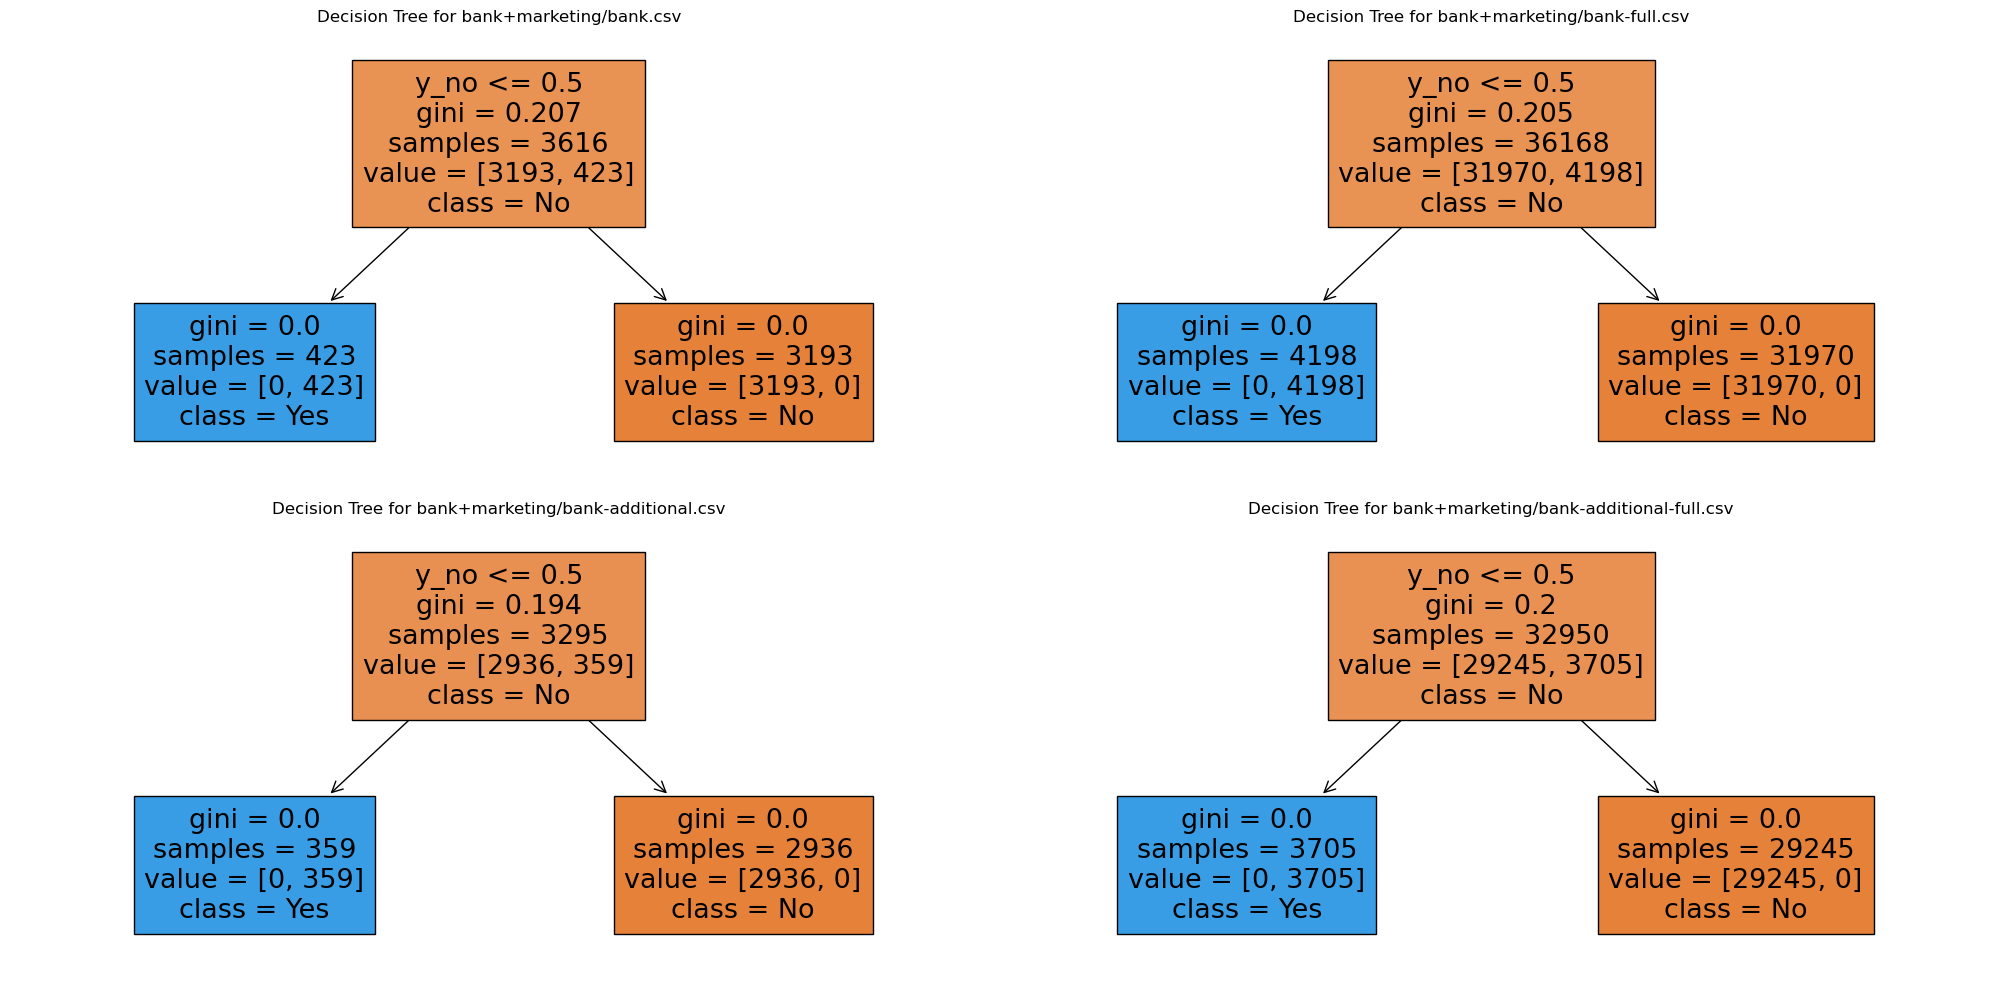

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# List of CSV files
csv_files = ["bank+marketing/bank.csv", 
             "bank+marketing/bank-full.csv", 
             "bank+marketing/bank-additional.csv", 
             "bank+marketing/bank-additional-full.csv"]

plt.figure(figsize=(20, 10))

# Iterate over each CSV file
for idx, file in enumerate(csv_files):
    # Load the dataset
    data = pd.read_csv(file, delimiter=";")
    
    # Convert categorical variables into dummy/indicator variables
    data = pd.get_dummies(data)
    
    # Split features and target variable
    X = data.drop('y_yes', axis=1)  # Features
    y = data['y_yes']  # Target variable
    
    # Print class distribution
    print(f"\nClass distribution for {file}:")
    print(y.value_counts())
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the decision tree classifier
    clf = DecisionTreeClassifier()
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict the test set results
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print accuracy for each dataset
    print(f"Accuracy for {file}: {accuracy}")
    
    # Visualize the decision tree
    ax = plt.subplot(2, 2, idx+1)
    plot_tree(clf, ax=ax, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
    plt.title(f"Decision Tree for {file}")

plt.tight_layout()
plt.show()
